In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [81]:
df = pd.read_csv("./archive/train_dataset.csv")

In [3]:
df.head().style.background_gradient(cmap="summer")

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.000000,0.900000,0.900000,1,1,118,78,97,239,153,70,142,19.800000,1,1.000000,61,115,125,1,1
1,20,175,110,110.000000,0.700000,0.900000,1,1,119,79,88,211,128,71,114,15.900000,1,1.100000,19,25,30,1,0
2,45,155,65,86.000000,0.900000,0.900000,1,1,110,80,80,193,120,57,112,13.700000,3,0.600000,1090,1400,276,0,0
3,45,165,80,94.000000,0.800000,0.700000,1,1,158,88,249,210,366,46,91,16.900000,1,0.900000,32,36,36,0,0
4,20,165,60,81.000000,1.500000,0.100000,1,1,109,64,100,179,200,47,92,14.900000,1,1.200000,26,28,15,0,0


In [4]:
df.isna().sum() # checking for any missing values

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [82]:
df1 = df.copy()
print("rows in dataset: ",df1.shape[0])
print("duplicate rows: ",df1.duplicated().sum())
df1 = df1.drop_duplicates()
print("rows after dropping duplicates in  dataset: ",df1.shape[0])

rows in dataset:  38984
duplicate rows:  5517
rows after dropping duplicates in  dataset:  33467


In [6]:
# df2 = df1.copy()
#
# target = df2[['smoking']]
# target.head()

,smoking
0,1
1,0
2,0
3,0
4,0


<AxesSubplot:xlabel='Urine protein', ylabel='count'>

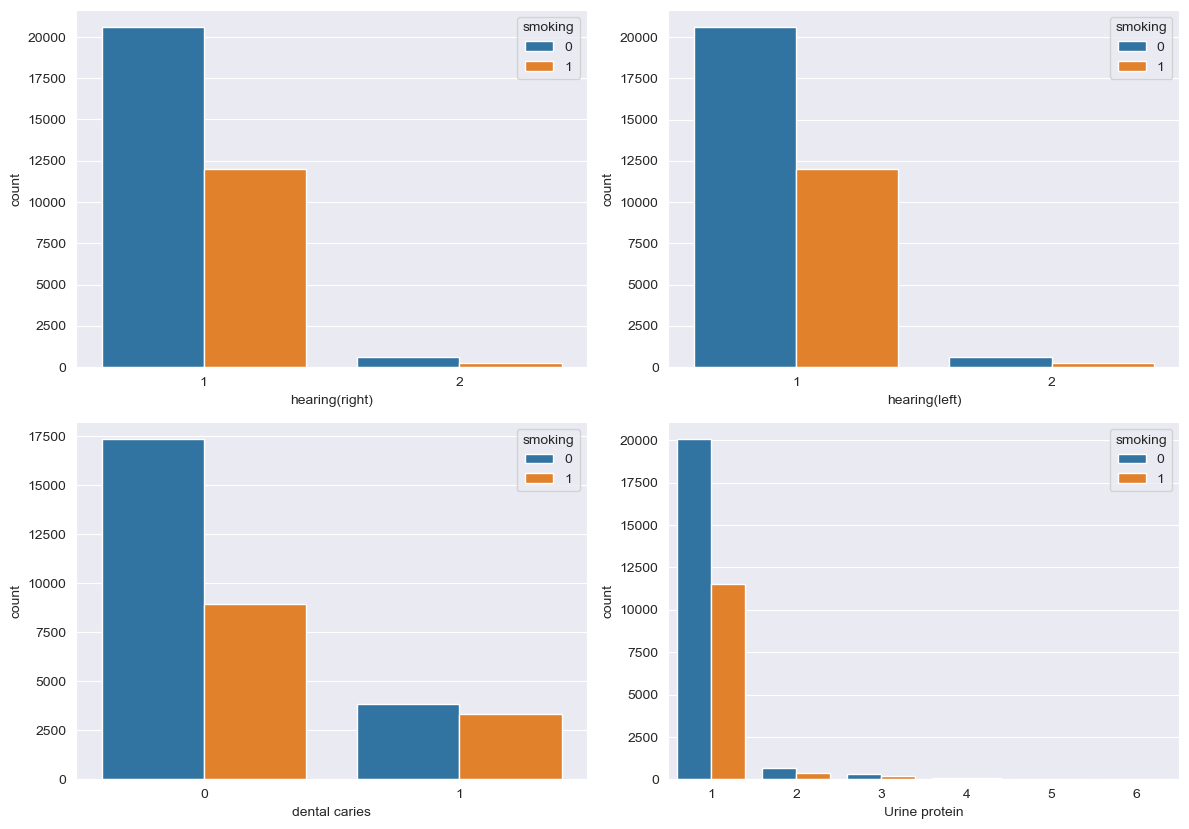

In [4]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data=df1,x="hearing(right)",hue='smoking')

plt.subplot(2,2,2)
sns.countplot(data=df1,x="hearing(left)",hue='smoking')
plt.tight_layout(pad=1.1)

plt.subplot(2,2,3)
sns.countplot(data=df1,x="dental caries",hue='smoking')

plt.subplot(2,2,4)
sns.countplot(data=df1,x="Urine protein",hue='smoking')

In [5]:
chi = ['hearing(left)','hearing(right)','dental caries','Urine protein']

for i in range(len(chi)):
    # print(chi[i])
    print('contingency table for '+chi[i]+ " and smoking")
    cross = pd.crosstab(df1[str(chi[i])],df1['smoking'])
    print(cross)
    chi2, p, dof, ex = stats.chi2_contingency(cross)
    print("")
    print('results of chi-Square test for '+chi[i]+ " and smoking")
    print("("+str(chi2)+", "+str(p)+", "+str(dof)+")")
    print("++++++++++++++++++++++++++++++++++++++++++++")

contingency table for hearing(left) and smoking
smoking            0      1
hearing(left)              
1              20612  12006
2                597    252

results of chi-Square test for hearing(left) and smoking
(17.796185766032348, 2.4587565024720927e-05, 1)
++++++++++++++++++++++++++++++++++++++++++++
contingency table for hearing(right) and smoking
smoking             0      1
hearing(right)              
1               20610  11985
2                 599    273

results of chi-Square test for hearing(right) and smoking
(10.681971148699716, 0.0010818472188142405, 1)
++++++++++++++++++++++++++++++++++++++++++++
contingency table for dental caries and smoking
smoking            0     1
dental caries             
0              17360  8922
1               3849  3336

results of chi-Square test for dental caries and smoking
(378.24617641567613, 2.997771257507368e-84, 1)
++++++++++++++++++++++++++++++++++++++++++++
contingency table for Urine protein and smoking
smoking            

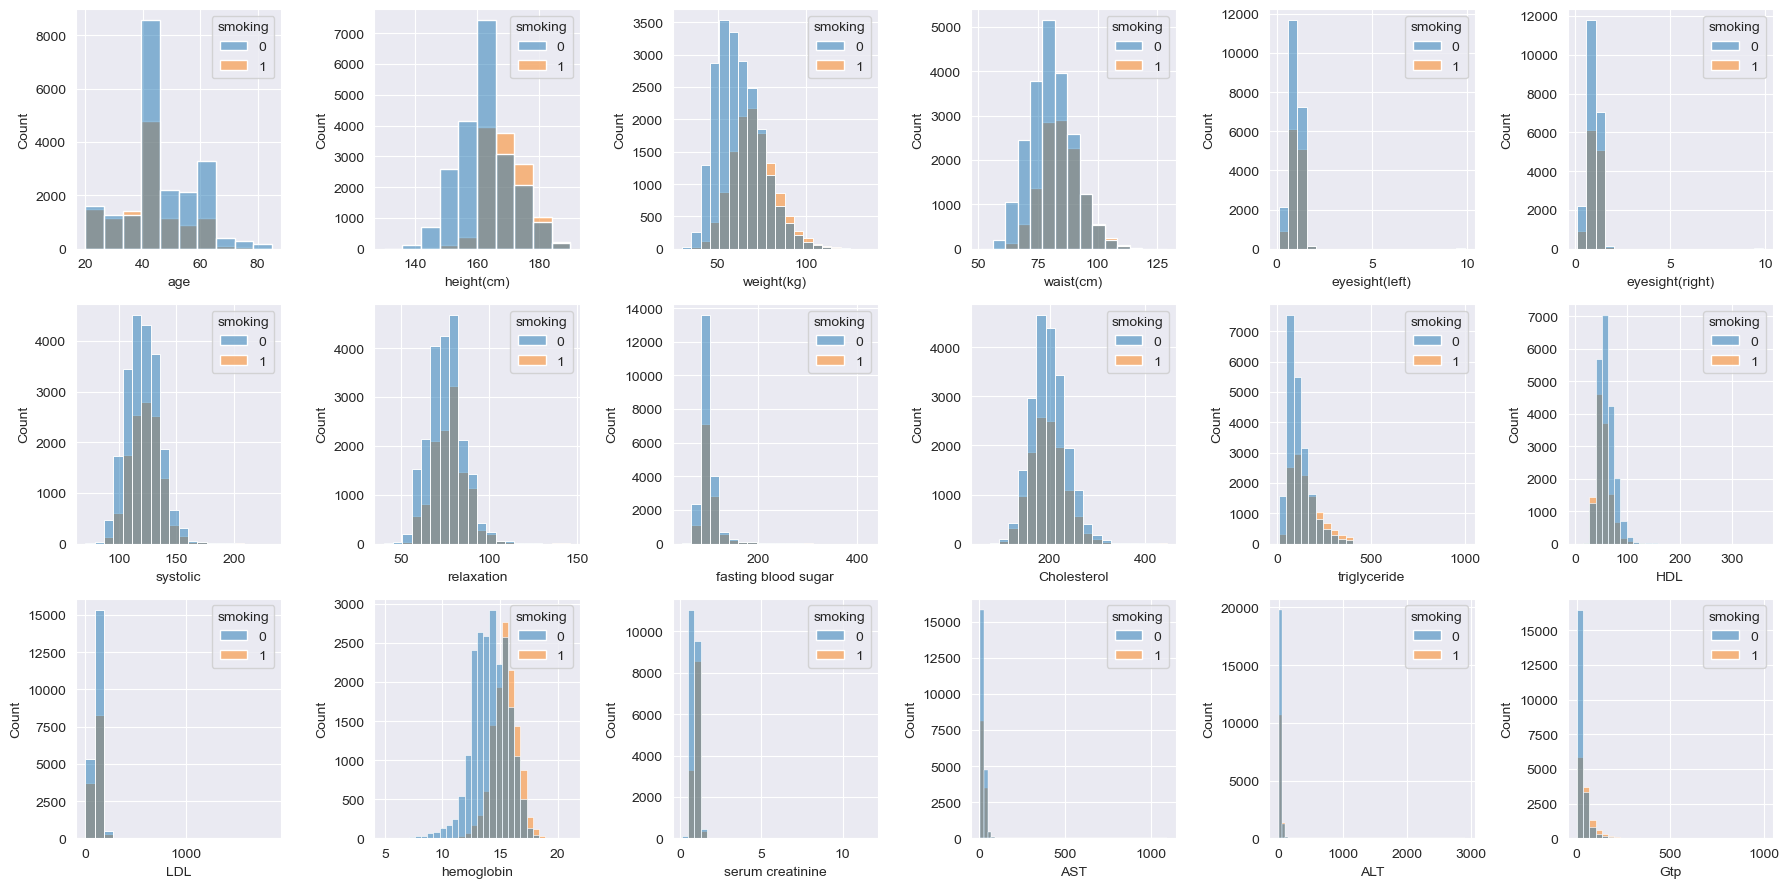

In [6]:
plt.figure(figsize=(18,9))
# plt.tight_layout(pad=1.1)

plt.subplot(3,6,1)
sns.histplot(data=df1, x="age", bins=10,hue='smoking')

plt.subplot(3,6,2)
sns.histplot(data=df1, x="height(cm)", bins=10,hue='smoking')

plt.subplot(3,6,3)
sns.histplot(data=df1, x="weight(kg)", bins=20,hue='smoking')

plt.subplot(3,6,4)
sns.histplot(data=df1, x="waist(cm)", bins=15,hue='smoking')

plt.subplot(3,6,5)
sns.histplot(data=df1, x="eyesight(left)", bins=20,hue='smoking')

plt.subplot(3,6,6)
sns.histplot(data=df1, x="eyesight(right)", bins=20,hue='smoking')

plt.subplot(3,6,7)
sns.histplot(data=df1, x="systolic", bins=20,hue='smoking')

plt.subplot(3,6,8)
sns.histplot(data=df1, x="relaxation", bins=20,hue='smoking')

plt.subplot(3,6,9)
sns.histplot(data=df1, x="fasting blood sugar", bins=20,hue='smoking')

plt.subplot(3,6,10)
sns.histplot(data=df1, x="Cholesterol", bins=20,hue='smoking')

plt.subplot(3,6,11)
sns.histplot(data=df1, x="triglyceride", bins=25,hue='smoking')

plt.subplot(3,6,12)
sns.histplot(data=df1, x="HDL", bins=30,hue='smoking')

plt.subplot(3,6,13)
sns.histplot(data=df1, x="LDL", bins=20,hue='smoking')

plt.subplot(3,6,14)
sns.histplot(data=df1, x="hemoglobin", bins=30,hue='smoking')

plt.subplot(3,6,15)
sns.histplot(data=df1, x="serum creatinine", bins=30,hue='smoking')

plt.subplot(3,6,16)
sns.histplot(data=df1, x="AST", bins=50,hue='smoking')

plt.subplot(3,6,17)
sns.histplot(data=df1, x="ALT", bins=60,hue='smoking')

plt.subplot(3,6,18)
sns.histplot(data=df1, x="Gtp", bins=30,hue='smoking')

plt.tight_layout(pad=1.1)

<AxesSubplot:xlabel='weight(kg)', ylabel='Count'>

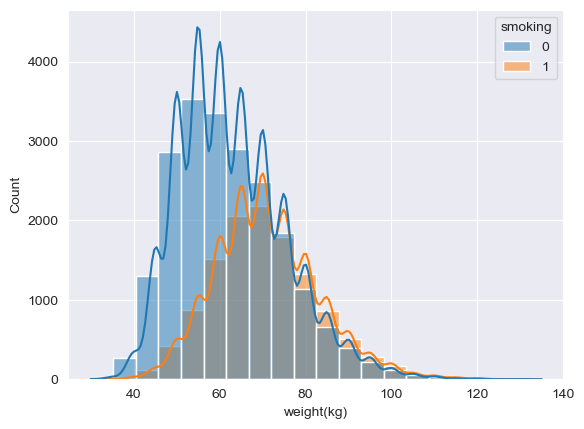

In [165]:
sns.histplot(data=df1, x="weight(kg)", bins=20,hue='smoking',kde=True)

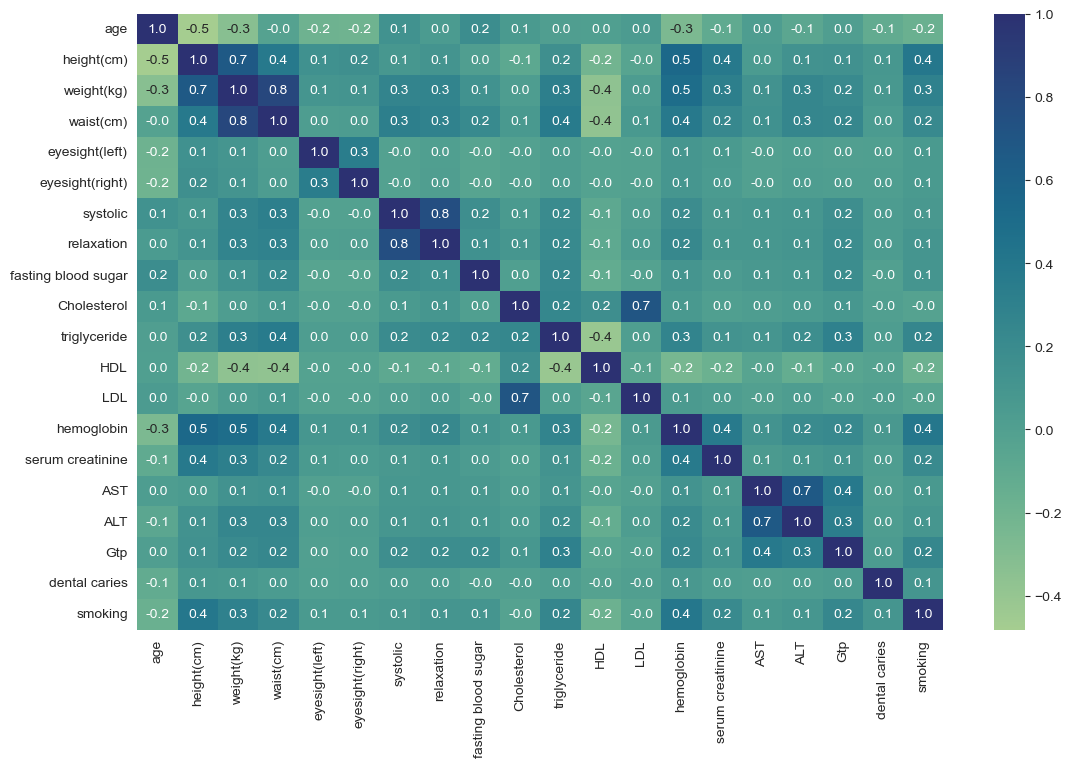

In [7]:
df2 = df1[["age","height(cm)","weight(kg)","waist(cm)","eyesight(left)","eyesight(right)","systolic","relaxation","fasting blood sugar","Cholesterol","triglyceride","HDL","LDL","hemoglobin","serum creatinine","AST","ALT","Gtp","dental caries","smoking"]]

corr = df2.corr()

plt.figure(figsize=(13,8))
s = sns.heatmap(corr, annot=True, fmt=".1f",cmap="crest")

In [11]:
df1.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,...,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000,33467.000000
mean,44.153943,164.684465,65.930319,82.081501,1.013849,1.009553,1.025368,1.026056,121.498730,76.017599,...,57.257537,115.182090,14.624463,1.086533,0.886467,26.195536,27.139929,39.952401,0.214689,0.366271
std,12.071768,9.195867,12.877955,9.310533,0.496245,0.497867,0.157243,0.159303,13.671019,9.672070,...,14.598021,43.159159,1.562414,0.403008,0.222038,18.760580,31.613159,49.965736,0.410613,0.481792
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.700000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [83]:
df2 = df1.loc[:, df1.columns != 'Urine protein']

list(df2.columns)

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

In [84]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df2.drop('smoking',axis = 1))
scaled_feature = scaler.transform(df2.drop('smoking',axis = 1))

In [85]:
scaled_df = pd.DataFrame(scaled_feature,columns = df2.drop('smoking',axis = 1).columns)
scaled_df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries
0,-0.758305,0.578044,1.480822,1.602349,-0.229425,-0.220047,-0.161334,-0.163562,-0.255927,0.204964,...,1.154305,0.364999,0.872903,0.621382,3.312576,0.511329,1.855219,2.779266,1.702144,1.912563
1,-2.000892,1.121774,3.422153,2.998638,-0.632458,-0.220047,-0.161334,-0.163562,-0.182778,0.308356,...,0.385417,0.016637,0.941406,-0.027389,0.816401,0.961709,-0.383551,-0.067692,-0.199187,1.912563
2,0.070087,-1.053148,-0.072242,0.420874,-0.229425,-0.220047,-0.161334,-0.163562,-0.841115,0.411748,...,-0.108868,-0.094839,-0.017642,-0.073730,-0.591698,-1.290192,56.705088,43.427504,4.724260,-0.522859
3,0.070087,0.034313,1.092556,1.280128,-0.430942,-0.621767,-0.161334,-0.163562,2.670014,1.238885,...,0.357957,3.333043,-0.771180,-0.560309,1.456446,0.060949,0.309401,0.280269,-0.079103,-0.522859
4,-2.000892,0.034313,-0.460509,-0.116161,0.979673,-1.826925,-0.161334,-0.163562,-0.914264,-1.242524,...,-0.493312,1.019920,-0.702677,-0.537138,0.176356,1.412090,-0.010423,0.027207,-0.499398,-0.522859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33462,-0.344109,0.578044,-0.072242,-0.545788,0.979673,0.985111,-0.161334,-0.163562,-0.841115,-1.449308,...,-0.273630,-0.596480,1.489434,-0.560309,0.944410,0.060949,0.096185,0.501700,-0.079103,1.912563
33463,-0.344109,0.034313,-0.460509,-0.223567,-1.237007,-0.822627,-0.161334,-0.163562,-1.060561,-1.656092,...,-1.454422,-1.028449,0.256372,-1.000546,-1.487761,-1.740573,-0.436855,-0.289122,-0.379314,1.912563
33464,0.070087,-1.053148,-0.848775,-0.760602,0.979673,0.382532,-0.161334,-0.163562,0.329261,-0.415388,...,0.824782,-0.373528,1.283923,0.366507,-1.359752,-1.290192,-0.170335,-0.510552,-0.559440,-0.522859
33465,-0.344109,-0.509417,-0.848775,-0.760602,0.979673,0.985111,-0.161334,-0.163562,-1.938343,-0.725564,...,0.248116,-1.098121,1.489434,0.018951,-1.679774,-1.290192,-0.117031,-0.225856,-0.459370,-0.522859


In [86]:
# splitting data for test and validation

from sklearn.model_selection import train_test_split

x = scaled_df
y=df2['smoking']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3,random_state=42)

In [87]:
print(x_training_data.shape)
print(x_test_data.shape)

(23426, 21)
(10041, 21)


In [89]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# for i in range(1,100):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_training_data,y_training_data)
#     predict = knn.predict(x_test_data)
#     error_rate.append(np.mean(predict != y_test_data))

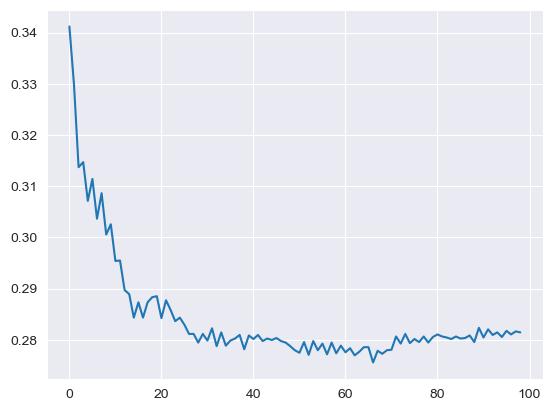

In [14]:
plt.plot(error_rate)

In [121]:
knn = KNeighborsClassifier(n_neighbors=65)

knn.fit(x_training_data,y_training_data)

predict = knn.predict(x_test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test_data,predict))
precision, recall, f1_score, cutoff_threshold = classification_report(y_test_data, predict, output_dict=True)['1'].values()

# print(cutoff_threshold)

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      6344
           1       0.64      0.57      0.60      3697

    accuracy                           0.72     10041
   macro avg       0.70      0.69      0.69     10041
weighted avg       0.72      0.72      0.72     10041



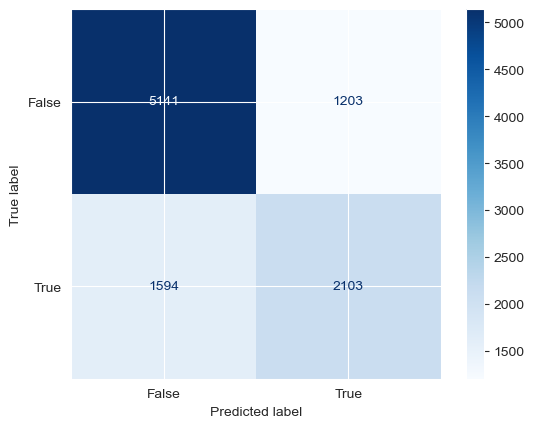

In [137]:
from sklearn import metrics
# print(confusion_matrix(y_test_data, predict))
cm = confusion_matrix(y_test_data, predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(cmap=plt.cm.Blues)
plt.show()

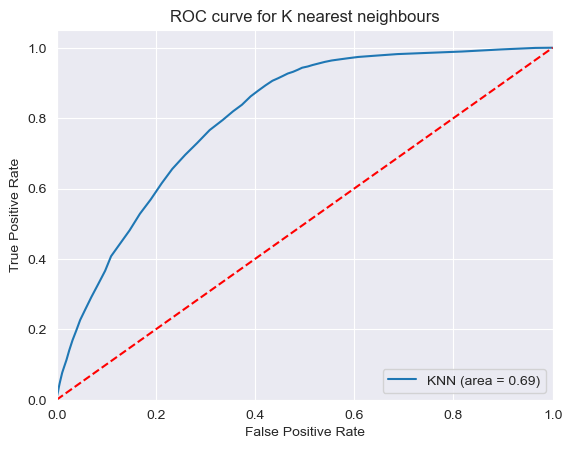

In [124]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_data, predict)
fpr, tpr, thresholds = roc_curve(y_test_data, knn.predict_proba(x_test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for K nearest neighbours')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [125]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_training_data,y_training_data)

log_pred = logreg.predict(x_test_data)

print(classification_report(y_test_data,log_pred))
precision, recall, f1_score, cutoff_threshold = classification_report(y_test_data, log_pred, output_dict=True)['1'].values()

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      6344
           1       0.63      0.56      0.59      3697

    accuracy                           0.72     10041
   macro avg       0.69      0.68      0.69     10041
weighted avg       0.71      0.72      0.71     10041



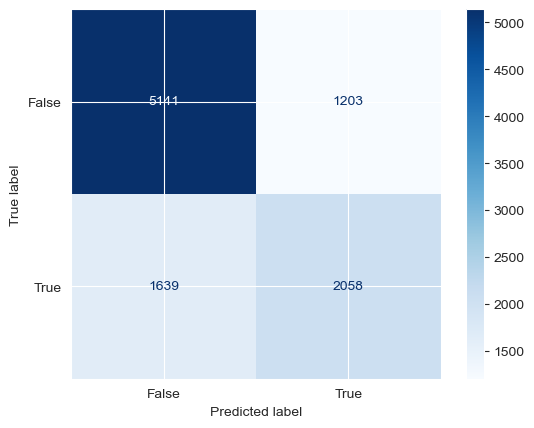

In [141]:
# print(confusion_matrix(y_test_data, log_pred))
cm = confusion_matrix(y_test_data, log_pred)
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(cmap=plt.cm.Blues)
plt.show()

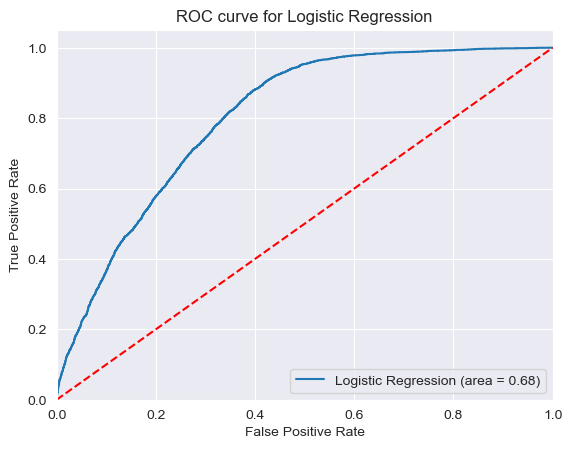

In [127]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_data, log_pred)
fpr, tpr, thresholds = roc_curve(y_test_data, logreg.predict_proba(x_test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [107]:
len(thresholds)

3416

In [128]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="gini", max_depth=8, min_samples_split=2)

dtc.fit(x_training_data,y_training_data)

dtc_pred = dtc.predict(x_test_data)

print(classification_report(y_test_data,dtc_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      6344
           1       0.61      0.65      0.63      3697

    accuracy                           0.72     10041
   macro avg       0.70      0.71      0.70     10041
weighted avg       0.72      0.72      0.72     10041



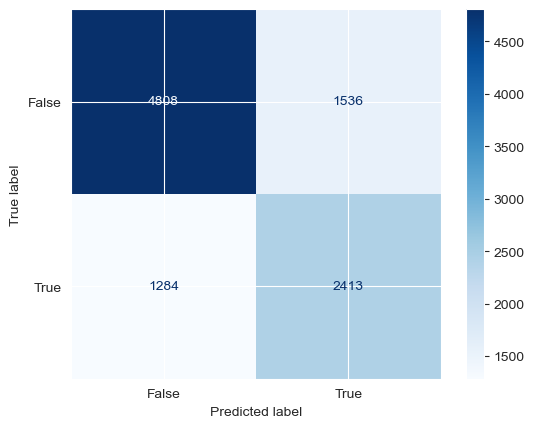

In [142]:
cm = confusion_matrix(y_test_data, dtc_pred)
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(cmap=plt.cm.Blues)
plt.show()

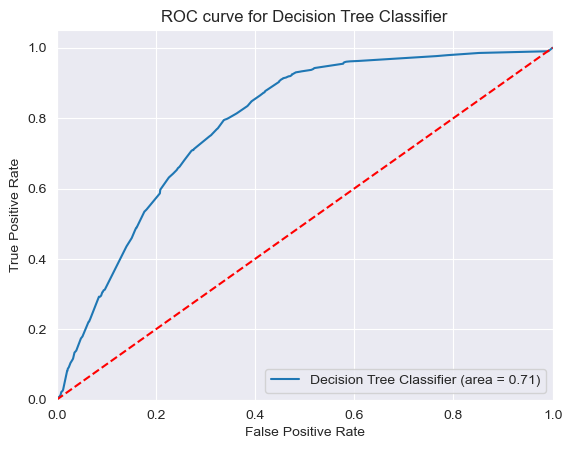

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_data, dtc_pred)
fpr, tpr, thresholds = roc_curve(y_test_data, dtc.predict_proba(x_test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [130]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_training_data,y_training_data)

rfc_pred = rfc.predict(x_test_data)
print(classification_report(y_test_data,rfc_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      6344
           1       0.66      0.63      0.64      3697

    accuracy                           0.74     10041
   macro avg       0.72      0.72      0.72     10041
weighted avg       0.74      0.74      0.74     10041



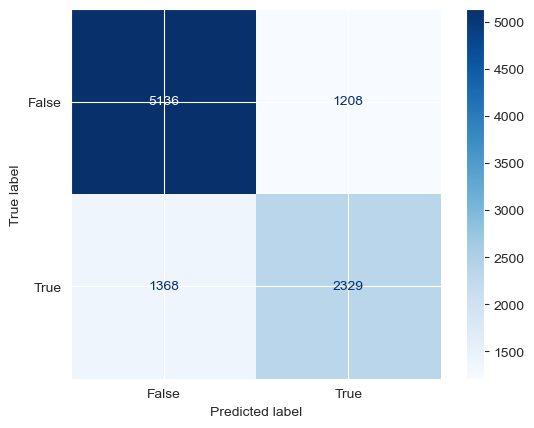

In [143]:
cm = confusion_matrix(y_test_data, rfc_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(cmap=plt.cm.Blues)
plt.show()

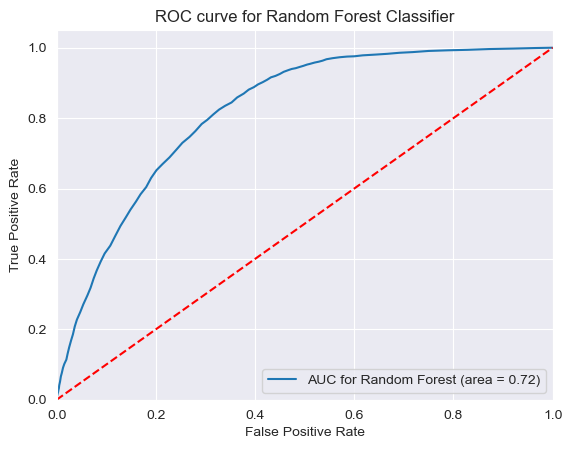

In [131]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_data, rfc_pred)
fpr, tpr, thresholds = roc_curve(y_test_data, rfc.predict_proba(x_test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC for Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [132]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', probability=True)

svm.fit(x_training_data,y_training_data)

svm_pred = svm.predict(x_test_data)
print(classification_report(y_test_data,svm_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      6344
           1       0.66      0.62      0.64      3697

    accuracy                           0.74     10041
   macro avg       0.72      0.72      0.72     10041
weighted avg       0.74      0.74      0.74     10041



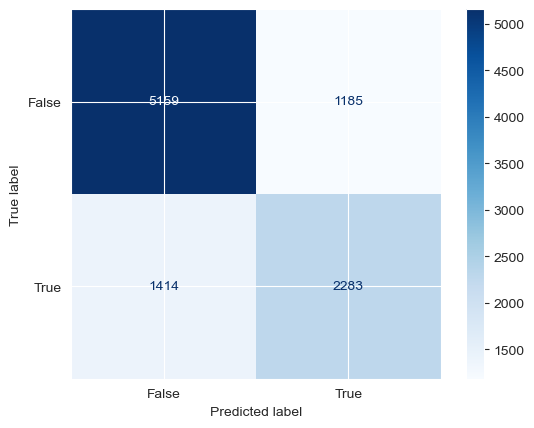

In [144]:
cm = confusion_matrix(y_test_data, svm_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot(cmap=plt.cm.Blues)
plt.show()

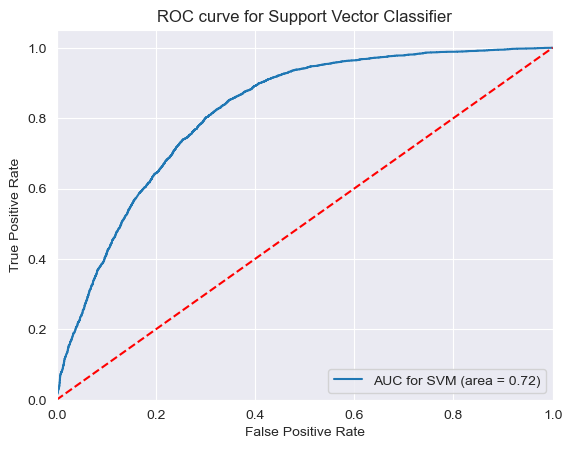

In [133]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(y_test_data, svm_pred)
fpr, tpr, thresholds = roc_curve(y_test_data, svm.predict_proba(x_test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC for SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Support Vector Classifier')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()